In [1]:
#Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing the dataset
rev = pd.read_csv("/content/drive/MyDrive/Deep Learning/Inventry Management/prorevenue.csv")
prod = pd.read_csv("/content/drive/MyDrive/Deep Learning/Inventry Management/productdetails.csv")

In [4]:
#Shape of the data
print("REVENUE :",rev.shape)
print('PRODUCT :',prod.shape)

REVENUE : (1017209, 8)
PRODUCT : (1115, 3)


In [5]:
#Information about datasets
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Product type       1017209 non-null  int64 
 1   Revenue            1017209 non-null  int64 
 2   No of purchases    1017209 non-null  int64 
 3   store status       1017209 non-null  object
 4   Promotion applied  1017209 non-null  int64 
 5   Generic Holiday    1017209 non-null  int64 
 6   Education Holiday  1017209 non-null  int64 
 7   DayOfWeek          1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 62.1+ MB


In [6]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   product type       1115 non-null   int64
 1   cost per unit      1115 non-null   int64
 2   Time for delivery  1115 non-null   int64
dtypes: int64(3)
memory usage: 26.3 KB


In [7]:
#Top 5 rows of the dataset
rev.head()

,Product type,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,1,14190,890,open,1,0,1,5
1,2,6064,789,open,1,0,1,5
2,3,14190,821,open,1,0,1,5
3,4,13995,456,open,1,0,1,5
4,5,4822,559,open,1,0,1,5


In [8]:
prod.head()

,product type,cost per unit,Time for delivery
0,1,457,11
1,2,1545,13
2,3,1910,14
3,4,131,9
4,5,868,8


In [9]:
#renaming the column names
rev.rename(columns={'Product type':'Product_type','No of purchases':'No_of_purchases','store status':'store_status',
                    'Promotion applied':'Promotion_applied','Generic Holiday':'Generic_Holiday','Education Holiday':'Education_Holiday'},inplace=True)


In [10]:
#checking missing values in revenue dataset
rev.isna().sum()

Product_type         0
Revenue              0
No_of_purchases      0
store_status         0
Promotion_applied    0
Generic_Holiday      0
Education_Holiday    0
DayOfWeek            0
dtype: int64

In [11]:
#renaming the column names
prod.rename(columns={'product type':'Product_type','cost per unit':'cost_per_unit',
                     'Time for delivery':'Time_for_delivery'},inplace=True)

In [12]:
#checking missing values in product dataset
prod.isna().sum()

Product_type         0
cost_per_unit        0
Time_for_delivery    0
dtype: int64

There are no missing values in both the datasets

In [13]:
#rev.drop_duplicates().reset_index(drop=True,inplace=True)
rev.head()

,Product_type,Revenue,No_of_purchases,store_status,Promotion_applied,Generic_Holiday,Education_Holiday,DayOfWeek
0,1,14190,890,open,1,0,1,5
1,2,6064,789,open,1,0,1,5
2,3,14190,821,open,1,0,1,5
3,4,13995,456,open,1,0,1,5
4,5,4822,559,open,1,0,1,5


There are about 152740 duplicate records

In [14]:
prod1 = prod.sort_values(by='cost_per_unit',ascending=False).head(80)
prod1

,Product_type,cost_per_unit,Time_for_delivery
582,583,1999,5
405,406,1999,14
924,925,1998,9
749,750,1996,8
471,472,1995,8
...,...,...,...
852,853,1863,14
716,717,1863,12
200,201,1862,13
888,889,1852,11


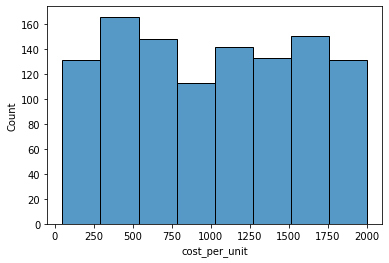

In [15]:
sns.histplot(prod.cost_per_unit,bins=8)

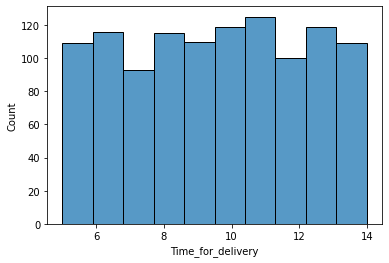

In [16]:
sns.histplot(prod.Time_for_delivery,bins=10)

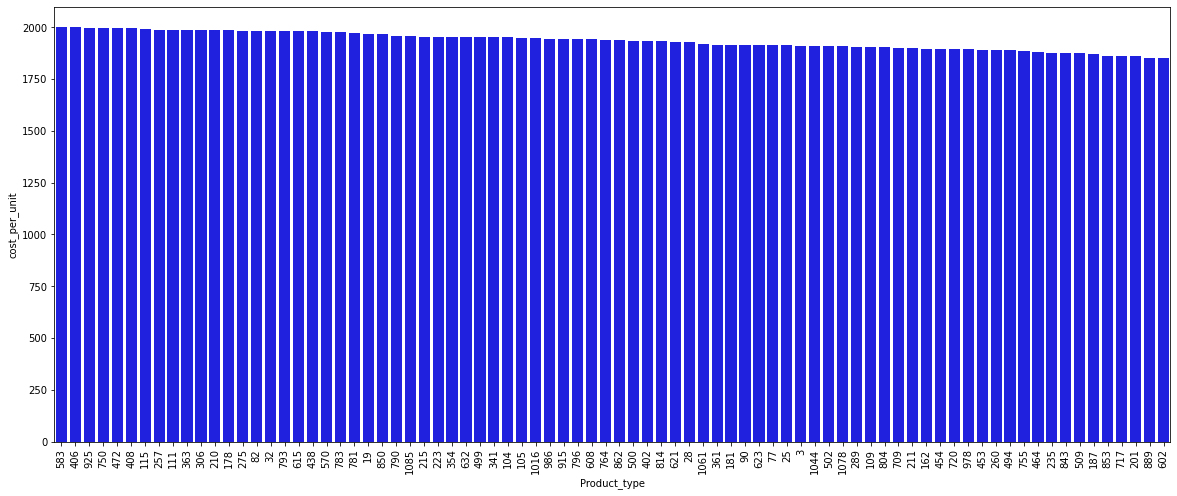

In [17]:
#EDA of product dataset
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(x=prod1.Product_type,y=prod1.cost_per_unit,order=prod1.sort_values('cost_per_unit',ascending=False).Product_type,color='blue')

In [18]:
prod2 = prod.sort_values(by='Time_for_delivery',ascending=False).head(80)

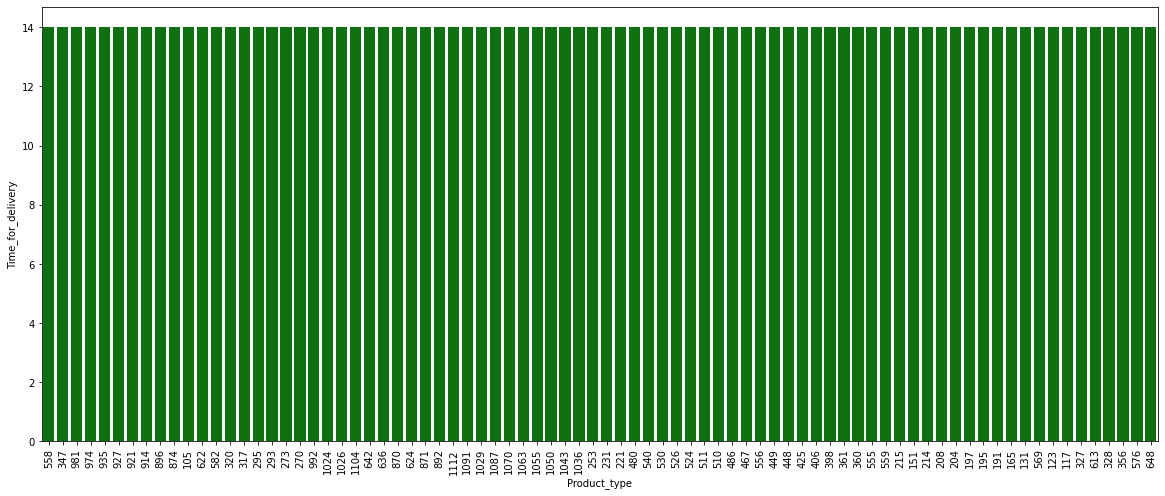

In [19]:
#EDA of product dataset
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(x=prod2.Product_type,y=prod2.Time_for_delivery,order=prod2.sort_values('Time_for_delivery',ascending=False).Product_type,color='green')

In [20]:
prod[(prod.cost_per_unit>1800) & (prod.Time_for_delivery<6)]

,Product_type,cost_per_unit,Time_for_delivery
18,19,1967,5
55,56,1820,5
210,211,1897,5
222,223,1952,5
400,401,1837,5
452,453,1892,5
582,583,1999,5
631,632,1952,5
789,790,1957,5
825,826,1841,5


In [21]:
prod[(prod.cost_per_unit<100) & (prod.Time_for_delivery>10)]

,Product_type,cost_per_unit,Time_for_delivery
129,130,78,11
310,311,57,12
332,333,66,12
480,481,90,13
642,643,51,11
712,713,80,11
735,736,87,11
900,901,80,13
1086,1087,86,14


In [22]:
rev.describe()

,Product_type,Revenue,No_of_purchases,Promotion_applied,Generic_Holiday,Education_Holiday,DayOfWeek
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.773832e+03,6.331444e+02,3.815145e-01,3.052470e-02,1.786467e-01,3.998341e+00
std,3.219087e+02,3.849954e+03,4.644115e+02,4.857586e-01,1.720261e-01,3.830564e-01,1.997391e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.800000e+02,3.727000e+03,4.050000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,5.580000e+02,5.744000e+03,6.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,8.380000e+02,7.856000e+03,8.370000e+02,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,1.115000e+03,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00


In [23]:
#merging two files
data = pd.merge(rev,prod,on='Product_type',how='left')
data.head()

,Product_type,Revenue,No_of_purchases,store_status,Promotion_applied,Generic_Holiday,Education_Holiday,DayOfWeek,cost_per_unit,Time_for_delivery
0,1,14190,890,open,1,0,1,5,457,11
1,2,6064,789,open,1,0,1,5,1545,13
2,3,14190,821,open,1,0,1,5,1910,14
3,4,13995,456,open,1,0,1,5,131,9
4,5,4822,559,open,1,0,1,5,868,8


In [24]:
#deleting no of purchases
data.drop('No_of_purchases',axis=1,inplace=True)

In [25]:
#creating new column no of units
data['no_of_units'] = 0
for i in range(0,len(data)):
  data['no_of_units'][i] = data.Revenue[i]/data.cost_per_unit[i]
data.head()

,Product_type,Revenue,store_status,Promotion_applied,Generic_Holiday,Education_Holiday,DayOfWeek,cost_per_unit,Time_for_delivery,no_of_units
0,1,14190,open,1,0,1,5,457,11,31
1,2,6064,open,1,0,1,5,1545,13,3
2,3,14190,open,1,0,1,5,1910,14,7
3,4,13995,open,1,0,1,5,131,9,106
4,5,4822,open,1,0,1,5,868,8,5


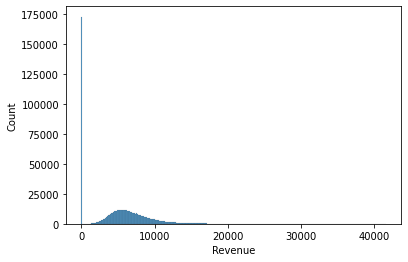

In [26]:
#Revenue variable
sns.histplot(data.Revenue)

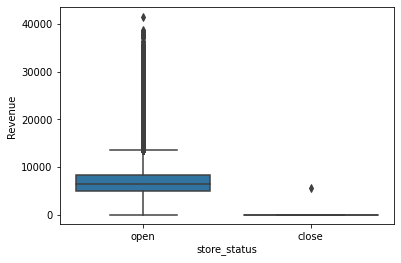

In [27]:
#revenue wrt to store status
sns.boxplot(y=data.Revenue,x=data.store_status)

In [28]:
data.store_status.value_counts()

open     844390
close    172819
Name: store_status, dtype: int64

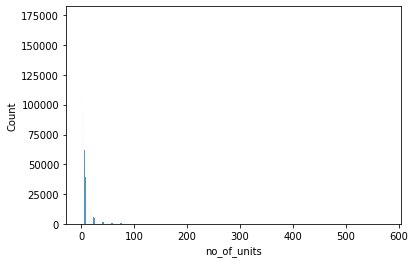

In [29]:
#No. of purchases variable
sns.histplot(data.no_of_units)

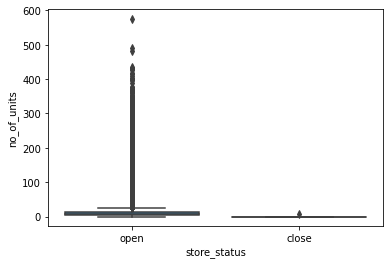

In [30]:
sns.boxplot(y=data.no_of_units,x=data.store_status)

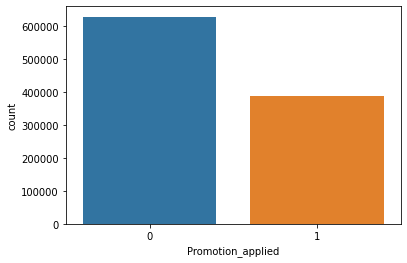

In [31]:
#Promotion applied Variable
sns.countplot(x=data.Promotion_applied)

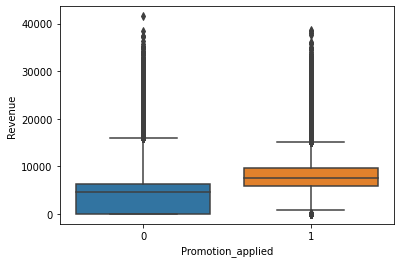

In [32]:
sns.boxplot(x=data.Promotion_applied,y=data.Revenue)

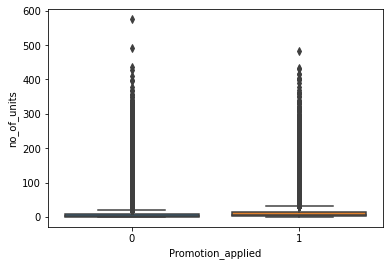

In [33]:
sns.boxplot(x=data.Promotion_applied,y=data.no_of_units)

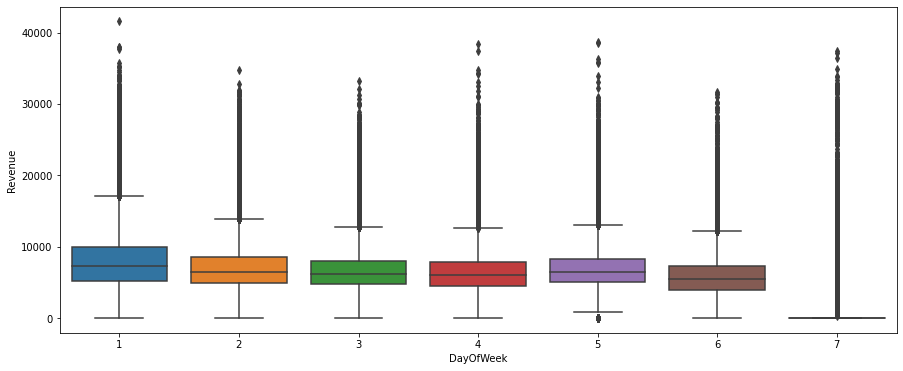

In [34]:
#Days of Week Variable
plt.figure(figsize=(15,6))
sns.boxplot(x=data.DayOfWeek,y=data.Revenue)

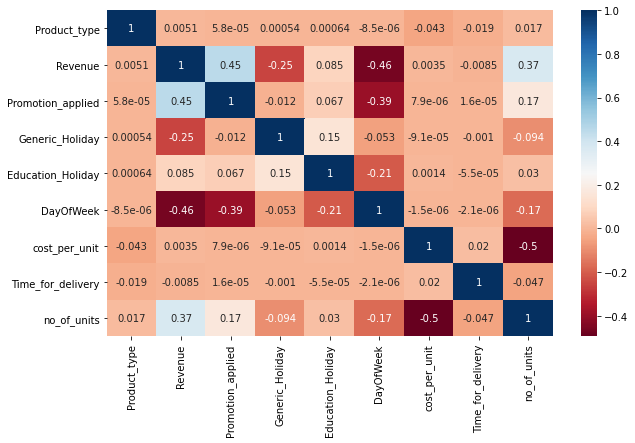

In [35]:
#corelation with heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

The No of purchases and Revenue variables are 89%  corelated

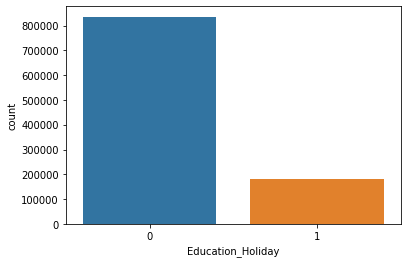

In [36]:
#Educational holiday variable
sns.countplot(data.Education_Holiday)

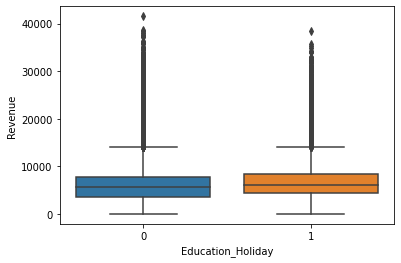

In [37]:
sns.boxplot(x=data.Education_Holiday,y=data.Revenue)

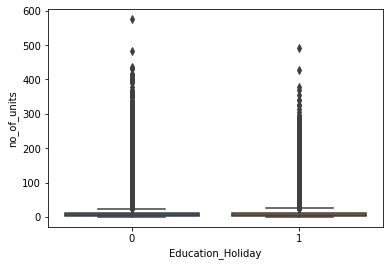

In [38]:
sns.boxplot(x=data.Education_Holiday,y=data.no_of_units)

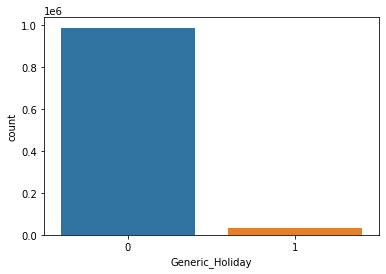

In [39]:
#Generic Holiday Variable
sns.countplot(data.Generic_Holiday)

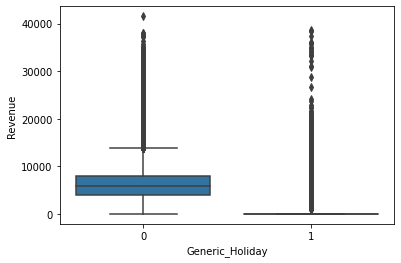

In [40]:
sns.boxplot(x=data.Generic_Holiday,y=data.Revenue)

In [41]:
data.groupby(['DayOfWeek']).mean()

,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,cost_per_unit,Time_for_delivery,no_of_units
DayOfWeek,,,,,,,,
1,558.427195,7809.044510,0.537276,0.048359,0.235335,1012.840227,9.543619,14.224259
2,558.437830,7005.244467,0.532596,0.009769,0.251229,1012.843915,9.543642,12.712462
3,558.440778,6555.884138,0.532592,0.023993,0.237778,1012.843559,9.543652,11.887866
4,558.423930,6247.575913,0.531935,0.077815,0.238246,1012.839425,9.543611,11.344530
5,558.423930,6723.368185,0.531935,0.048517,0.248449,1012.839425,9.543611,12.262902
6,558.427195,5847.562599,0.000000,0.002757,0.018821,1012.840227,9.543619,10.755559
7,558.427195,204.183189,0.000000,0.002135,0.018821,1012.840227,9.543619,0.424604


In [42]:
pd.pivot_table(index='DayOfWeek',values=['Revenue','no_of_units'],data=data,aggfunc='max')

,Revenue,no_of_units
DayOfWeek,,
1,41551,491
2,34692,398
3,33151,401
4,38367,396
5,38722,575
6,31683,435
7,37376,238


In [43]:
def Daywise(Day):
  print('Sorted based on revenue top 10 records :')
  print(Day.sort_values(by='Revenue',ascending=False).iloc[:10,])
  fig, axes = plt.subplots(4,tight_layout=True,figsize=(15,15))
  x = Day.groupby(['Product_type']).sum().sort_values(by='Revenue',ascending=False).iloc[:25,]
  axes[0].set_title('DayOfWeek : {} Top 25 Products based on Revenue'.format(Day.DayOfWeek.iloc[0]))
  axes[0].grid(axis='y')
  sns.barplot(x=x.index,y=x.Revenue,ax=axes[0],order=x.sort_values('Revenue',ascending=False).index,color='Blue')
  axes[1].grid(axis='y')
  sns.barplot(x=x.index,y=x.no_of_units,ax=axes[1],order=x.sort_values('Revenue',ascending=False).index,color='Green')
  axes[2].grid(axis='y')
  axes[2].set_title('Cost per Unit')
  sns.barplot(x=x.index,y=x.cost_per_unit,ax=axes[2],order=x.sort_values('Revenue',ascending=False).index,color='Red')
  axes[3].set_title('Time for Delivery')
  axes[3].grid(axis='y')
  sns.barplot(x=x.index,y=x.Time_for_delivery,ax=axes[3],order=x.sort_values('Revenue',ascending=False).index,color='black')
  plt.show()

Sorted based on revenue top 10 records :
        Product_type  Revenue  ... Time_for_delivery  no_of_units
44393            909    41551  ...                10           37
424086            57    38037  ...                13           36
627776           817    38025  ...                12           27
627220           261    37646  ...                 6           29
620268          1114    35697  ...                13           28
619405           251    35350  ...                 9           21
74966            262    35159  ...                 6           42
627801           842    35154  ...                 9          107
432096           262    34692  ...                 6           41
627210           251    34475  ...                 9           21

[10 rows x 10 columns]


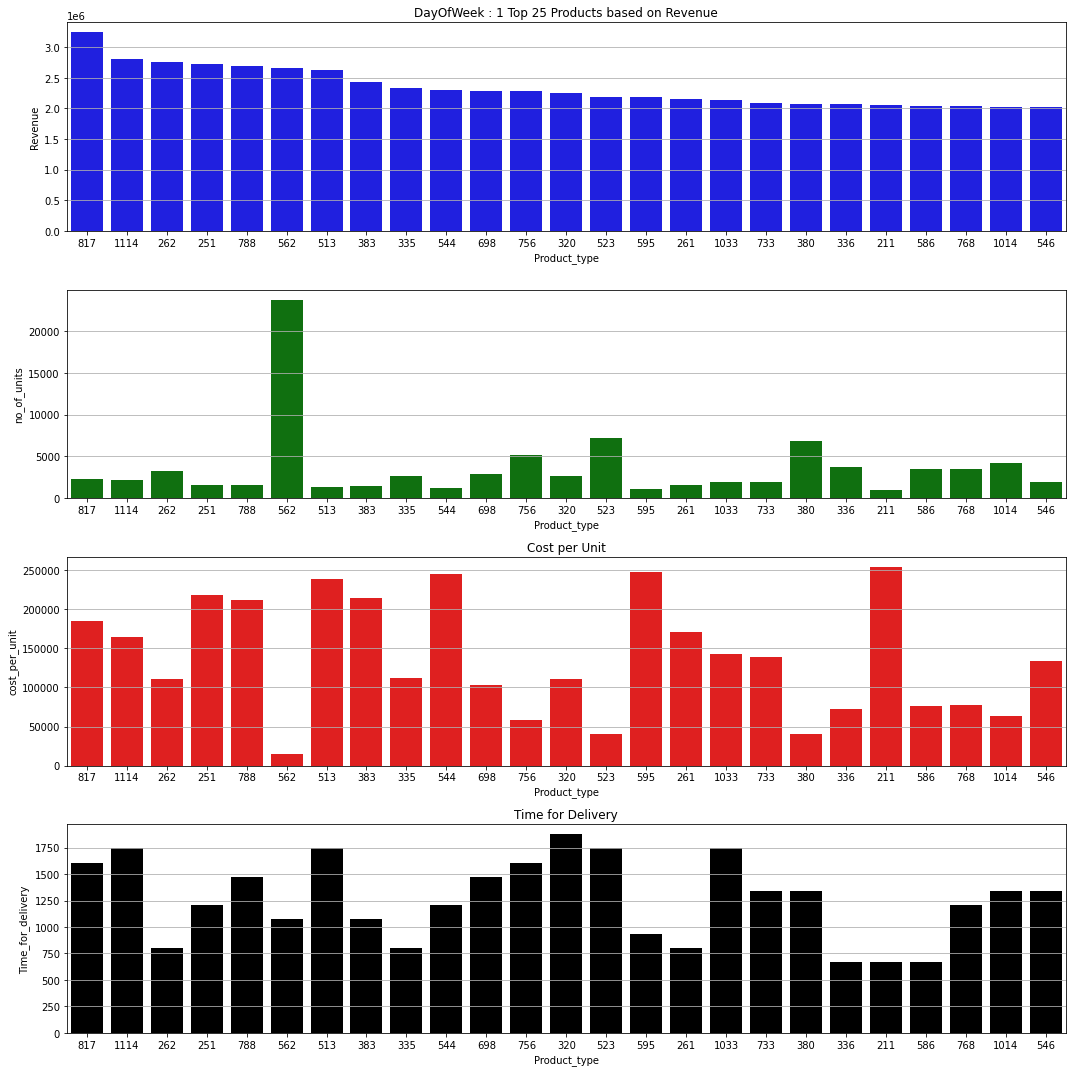

In [44]:
#Getting Day-1 data
Day_1 = data[data.DayOfWeek==1]
Daywise(Day_1)

Sorted based on revenue top 10 records :
        Product_type  Revenue  ... Time_for_delivery  no_of_units
422971            57    34692  ...                13           33
626661           817    32764  ...                12           23
244065           251    31930  ...                 9           19
493976           817    31842  ...                12           22
251084           817    31609  ...                12           22
626095           251    31409  ...                 9           19
642271           817    31406  ...                12           22
884226           817    31375  ...                12           22
626686           842    31146  ...                 9           95
250610           251    31104  ...                 9           19

[10 rows x 10 columns]


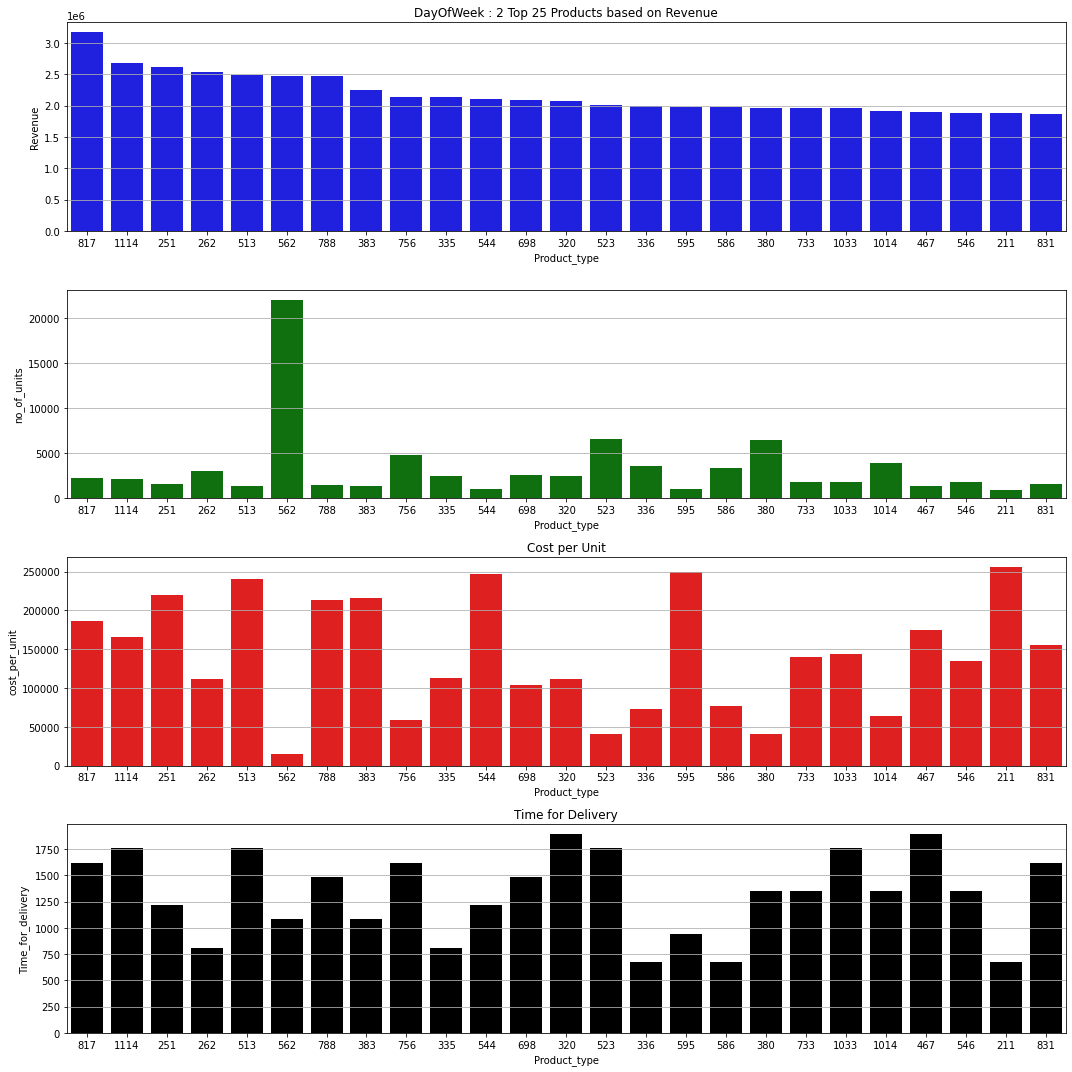

In [45]:
#Getting Day-2 data
Day_2 = data[data.DayOfWeek==2]
Daywise(Day_2)

Sorted based on revenue top 10 records :
        Product_type  Revenue  ... Time_for_delivery  no_of_units
882556           262    33151  ...                 6           40
625546           817    32149  ...                12           23
624980           251    31185  ...                 9           19
922136           817    30693  ...                12           22
625571           842    30074  ...                 9           92
492861           817    29944  ...                12           21
625843          1114    29833  ...                13           24
250149           817    29816  ...                12           21
625315           586    28794  ...                 5           50
136028          1114    28446  ...                13           23

[10 rows x 10 columns]


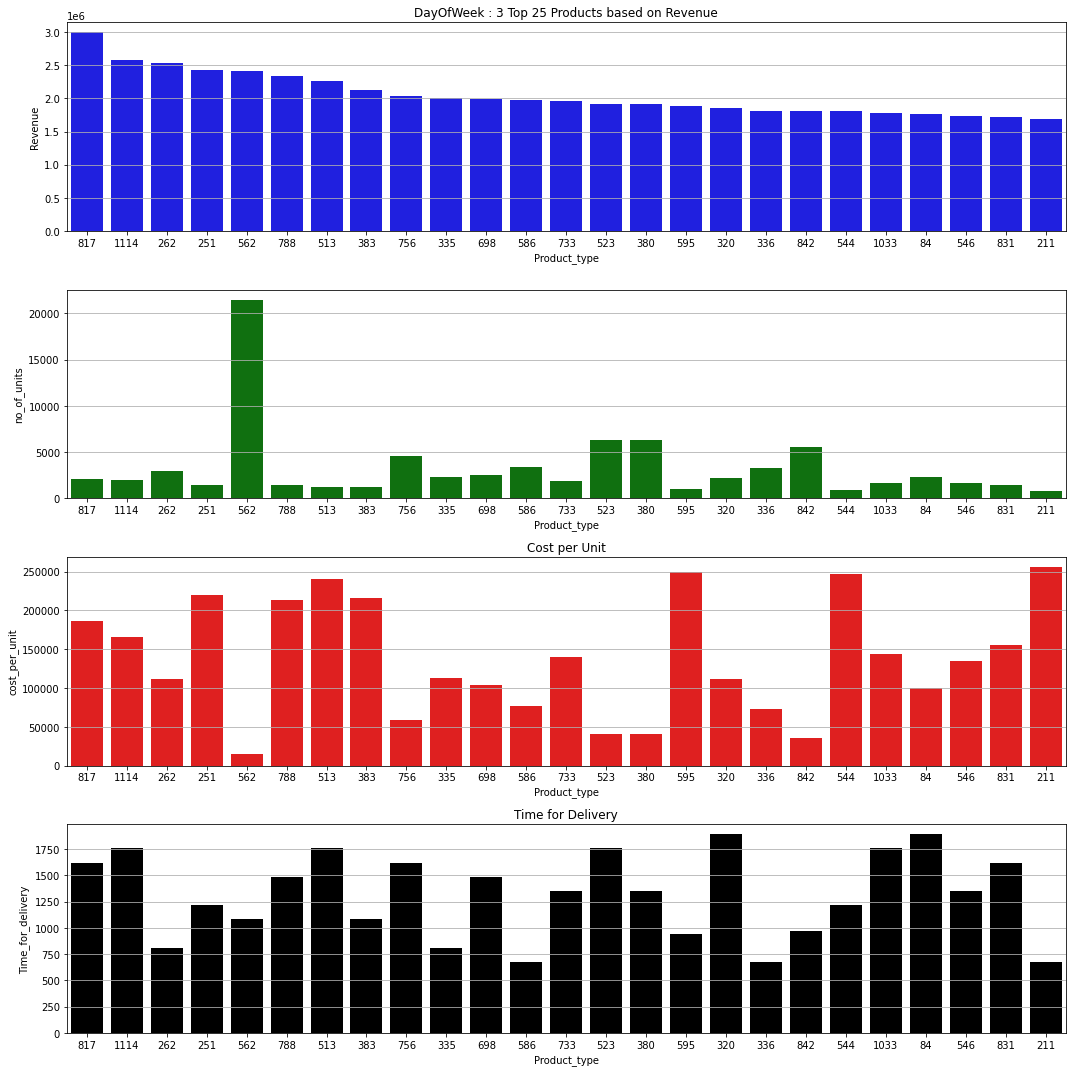

In [46]:
#Getting Day-3 data
Day_3 = data[data.DayOfWeek==3]
Daywise(Day_3)

Sorted based on revenue top 10 records :
        Product_type  Revenue  ... Time_for_delivery  no_of_units
87231            262    38367  ...                 6           46
444361           262    37403  ...                 6           45
475581           262    34814  ...                 6           42
709731           262    34369  ...                 6           41
873636           262    34133  ...                 6           41
686180           126    33071  ...                 5           37
921021           817    32529  ...                12           23
134913          1114    31803  ...                13           25
640041           817    31073  ...                12           22
624431           817    31000  ...                12           22

[10 rows x 10 columns]


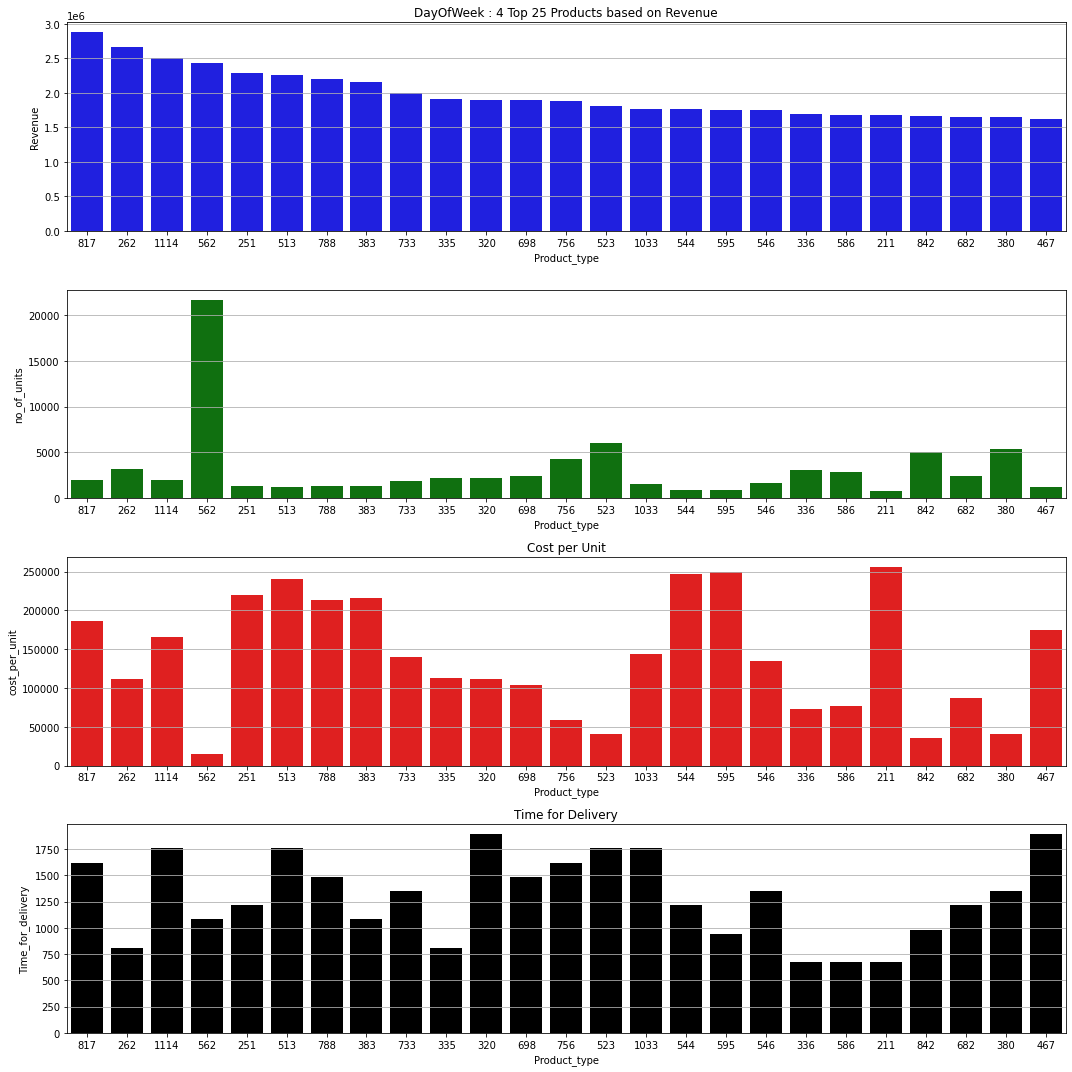

In [47]:
#Getting Day-4 data
Day_4 = data[data.DayOfWeek==4]
Daywise(Day_4)

Sorted based on revenue top 10 records :
        Product_type  Revenue  ... Time_for_delivery  no_of_units
132946           262    38722  ...                 6           46
101726           262    38484  ...                 6           46
919351           262    36227  ...                 6           43
490076           262    35909  ...                 6           43
319810           262    35702  ...                 6           43
833582           348    33934  ...                 9          575
420411           842    33093  ...                 9          101
241270           262    32169  ...                 6           38
623613          1114    30924  ...                13           25
623255           756    30826  ...                12           70

[10 rows x 10 columns]


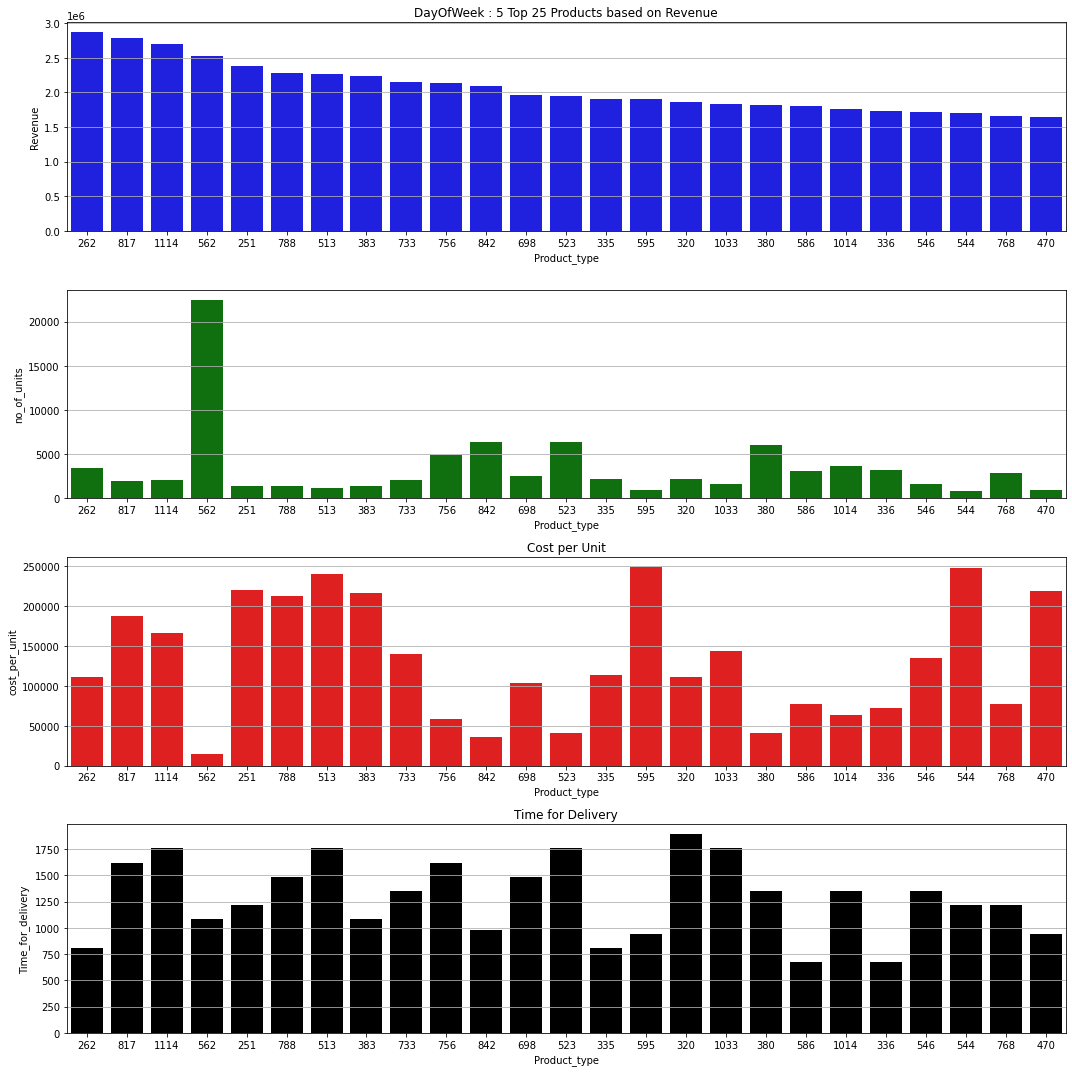

In [48]:
#Getting Day-5 data
Day_5 = data[data.DayOfWeek==5]
Daywise(Day_5)

Sorted based on revenue top 10 records :
        Product_type  Revenue  ... Time_for_delivery  no_of_units
132683          1114    31683  ...                13           25
965364           560    31448  ...                 7           19
101463          1114    31445  ...                13           25
645913          1114    30940  ...                13           25
622498          1114    30329  ...                13           24
101191           842    30169  ...                 9           92
267233          1114    30066  ...                13           24
621635           251    29601  ...                 9           18
622140           756    29471  ...                12           67
132411           842    29428  ...                 9           90

[10 rows x 10 columns]


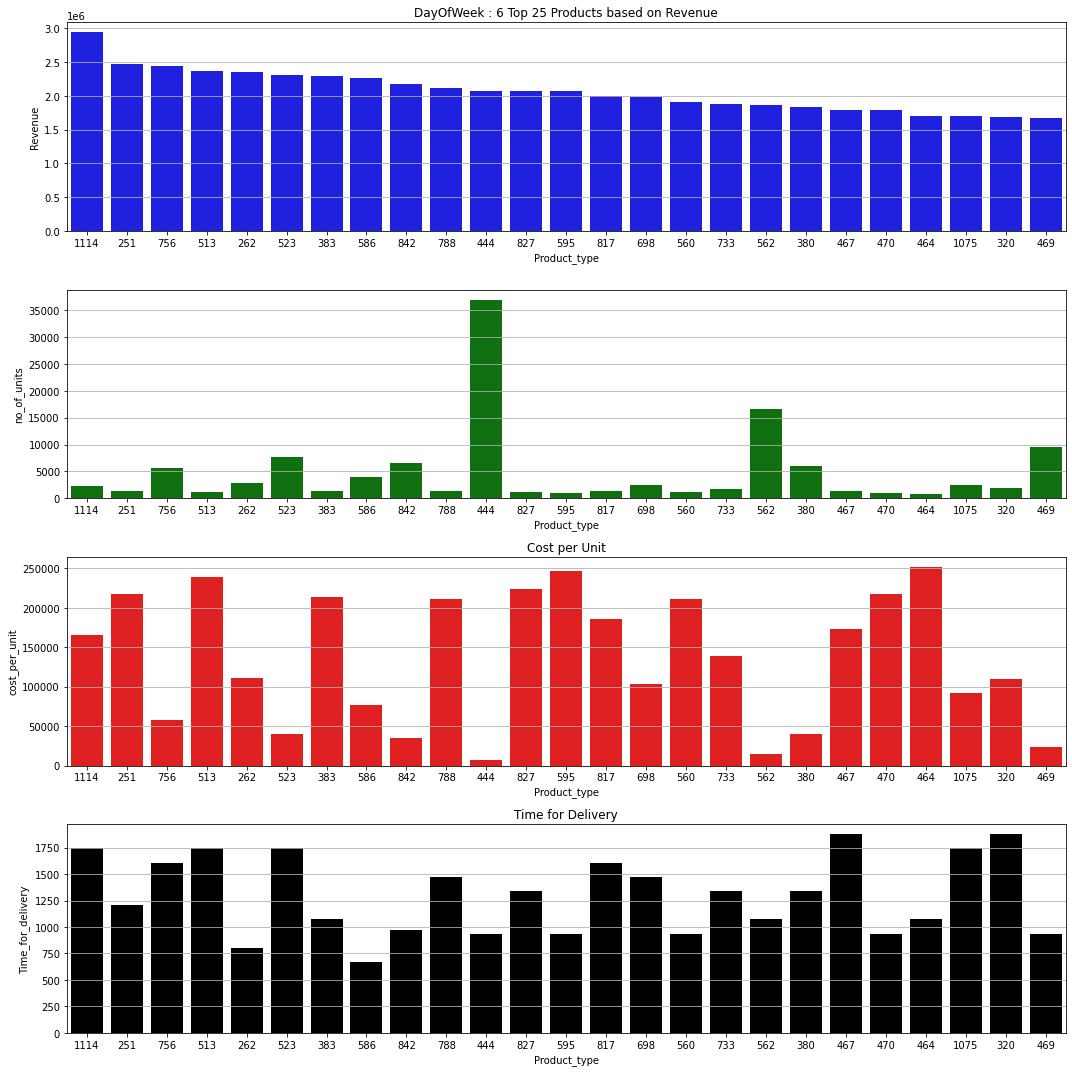

In [49]:
#Getting Day-6 data
Day_6 = data[data.DayOfWeek==6]
Daywise(Day_6)

Sorted based on revenue top 10 records :
        Product_type  Revenue  ... Time_for_delivery  no_of_units
620531           262    37376  ...                 6           45
245945           262    37122  ...                 6           44
265580           262    36417  ...                 6           44
643946           262    34904  ...                 6           42
350665           262    33913  ...                 6           41
441016           262    33800  ...                 6           40
862486           262    33357  ...                 6           40
745411           262    32926  ...                 6           39
252490           262    32854  ...                 6           39
433211           262    32605  ...                 6           39

[10 rows x 10 columns]


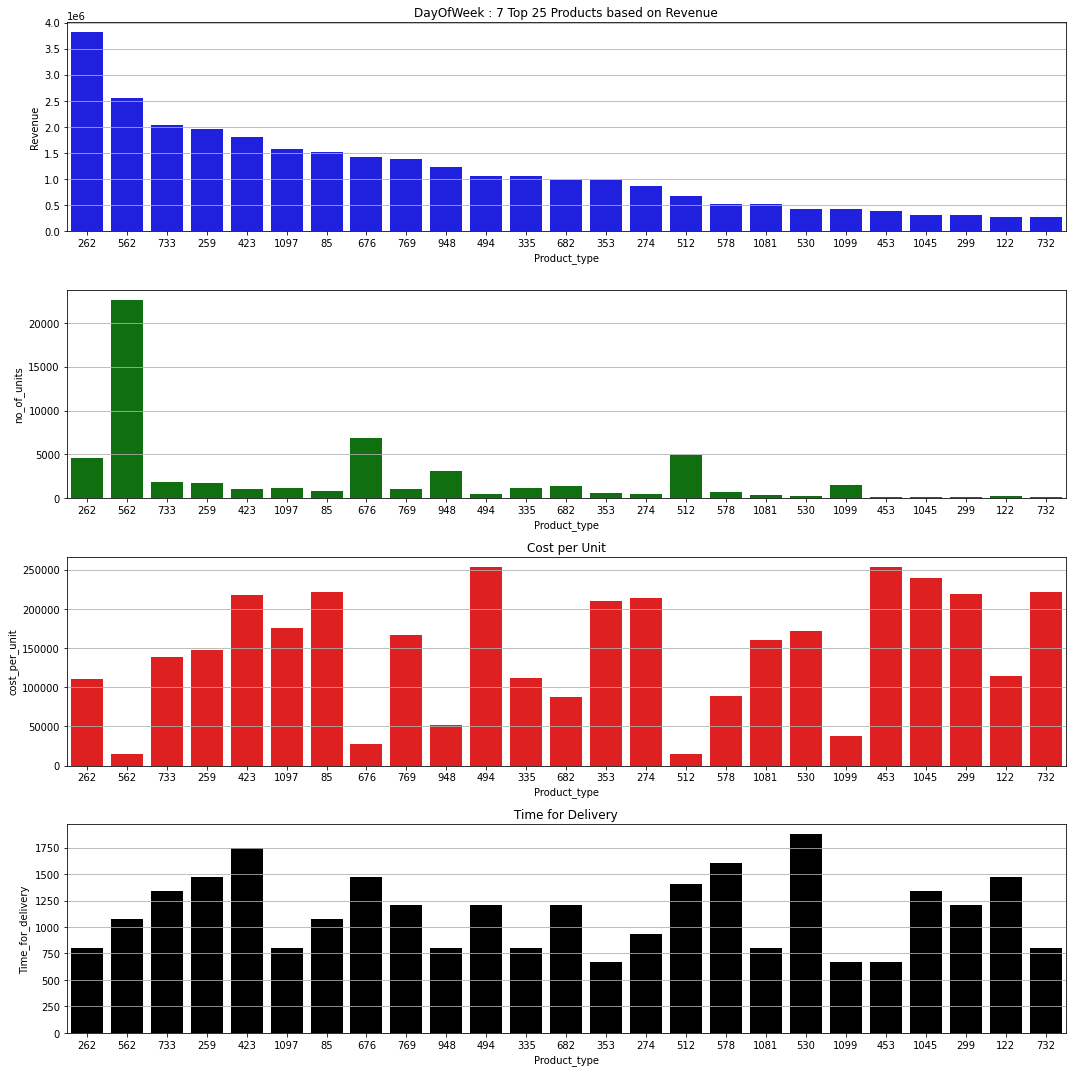

In [50]:
#Getting Day-7 data
Day_7 = data[data.DayOfWeek==7]
Daywise(Day_7)

In [51]:
data.head()

,Product_type,Revenue,store_status,Promotion_applied,Generic_Holiday,Education_Holiday,DayOfWeek,cost_per_unit,Time_for_delivery,no_of_units
0,1,14190,open,1,0,1,5,457,11,31
1,2,6064,open,1,0,1,5,1545,13,3
2,3,14190,open,1,0,1,5,1910,14,7
3,4,13995,open,1,0,1,5,131,9,106
4,5,4822,open,1,0,1,5,868,8,5


In [52]:
data.iloc[0:7805,]

,Product_type,Revenue,store_status,Promotion_applied,Generic_Holiday,Education_Holiday,DayOfWeek,cost_per_unit,Time_for_delivery,no_of_units
0,1,14190,open,1,0,1,5,457,11,31
1,2,6064,open,1,0,1,5,1545,13,3
2,3,14190,open,1,0,1,5,1910,14,7
3,4,13995,open,1,0,1,5,131,9,106
4,5,4822,open,1,0,1,5,868,8,5
...,...,...,...,...,...,...,...,...,...,...
7800,1111,2177,open,0,0,0,6,1269,11,1
7801,1112,6216,open,0,0,0,6,967,14,6
7802,1113,4784,open,0,0,0,6,412,8,11
7803,1114,21312,open,0,0,0,6,1232,13,17


In [53]:
1115*7

7805

In [104]:
data[data['week_no'] == 1]

,Product_type,Revenue,store_status,Promotion_applied,Generic_Holiday,Education_Holiday,DayOfWeek,cost_per_unit,Time_for_delivery,no_of_units,week_no,month_no,year
0,1,14190,open,1,0,1,5,457,11,31,1,1,1
1,2,6064,open,1,0,1,5,1545,13,3,1,1,1
2,3,14190,open,1,0,1,5,1910,14,7,1,1,1
3,4,13995,open,1,0,1,5,131,9,106,1,1,1
4,5,4822,open,1,0,1,5,868,8,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,0,close,0,1,1,2,1269,11,0,1,34,3
1017205,1112,0,close,0,1,1,2,967,14,0,1,34,3
1017206,1113,0,close,0,1,1,2,412,8,0,1,34,3
1017207,1114,0,close,0,1,1,2,1232,13,0,1,34,3


In [105]:
#updating from 1 to 30th week
data['week_no'] = 0
x = 0
for i in range(0,234150,7805):
  data.week_no[i:i+7805] = x + 1
  x+=1

In [106]:
#updating 31st week
for i in range(234150,241055):
  data.week_no[i:i+6905] = 31

In [107]:
#updating form 32nd week to 57th week
x = 31
for i in range(241055,404680,6545):
  data.week_no[i:i+6545] = x + 1
  x+=1

In [108]:
#updating 58th week
for i in range(404680,411765):
  data.week_no[i:i+7085] = 58

In [109]:
#updating from 58th week to 135th week
x = 57
for i in range(411765,len(data),7805):
  data.week_no[i:i+7805] = x + 1
  x+=1

In [110]:
data[data.week_no==135]

,Product_type,Revenue,store_status,Promotion_applied,Generic_Holiday,Education_Holiday,DayOfWeek,cost_per_unit,Time_for_delivery,no_of_units,week_no,month_no,year
1012750,1,4486,open,0,0,1,5,457,11,9,135,34,3
1012751,2,4484,open,0,0,1,5,1545,13,2,135,34,3
1012752,3,6069,open,0,0,1,5,1910,14,3,135,34,3
1012753,4,8290,open,0,0,1,5,131,9,63,135,34,3
1012754,5,4456,open,0,0,0,5,868,8,5,135,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,0,close,0,1,1,2,1269,11,0,135,34,3
1017205,1112,0,close,0,1,1,2,967,14,0,135,34,3
1017206,1113,0,close,0,1,1,2,412,8,0,135,34,3
1017207,1114,0,close,0,1,1,2,1232,13,0,135,34,3


In [60]:
#updating months
data['month_no'] = 0
x = 0
for i in range(0,136,4):
  data.month_no[(data.week_no>i) & (data.week_no<=i+4)] = x+1
  x+=1

In [61]:
#updating years
data['year'] = 0
x = 0
for i in range(0,34,12):
  data.year[(data.month_no>i) & (data.month_no<=i+12)] = x+1
  x+=1

In [62]:
data.drop(['store_status','Education_Holiday'],axis=1)

,Product_type,Revenue,Promotion_applied,Generic_Holiday,DayOfWeek,cost_per_unit,Time_for_delivery,no_of_units,week_no,month_no,year
0,1,14190,1,0,5,457,11,31,1,1,1
1,2,6064,1,0,5,1545,13,3,1,1,1
2,3,14190,1,0,5,1910,14,7,1,1,1
3,4,13995,1,0,5,131,9,106,1,1,1
4,5,4822,1,0,5,868,8,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,0,0,1,2,1269,11,0,135,34,3
1017205,1112,0,0,1,2,967,14,0,135,34,3
1017206,1113,0,0,1,2,412,8,0,135,34,3
1017207,1114,0,0,1,2,1232,13,0,135,34,3


In [63]:
data[data.year==1]

,Product_type,Revenue,store_status,Promotion_applied,Generic_Holiday,Education_Holiday,DayOfWeek,cost_per_unit,Time_for_delivery,no_of_units,week_no,month_no,year
0,1,14190,open,1,0,1,5,457,11,31,1,1,1
1,2,6064,open,1,0,1,5,1545,13,3,1,1,1
2,3,14190,open,1,0,1,5,1910,14,7,1,1,1
3,4,13995,open,1,0,1,5,131,9,106,1,1,1
4,5,4822,open,1,0,1,5,868,8,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352315,1111,2590,open,0,0,0,6,1269,11,2,48,12,1
352316,1112,8419,open,0,0,0,6,967,14,8,48,12,1
352317,1113,6160,open,0,0,0,6,412,8,14,48,12,1
352318,1114,23253,open,0,0,0,6,1232,13,18,48,12,1


In [64]:
#defining month wise function
def Month_wise(month):
  print('Sorted based on number of units purchased top 10 records :')
  print(month.sort_values(by='Revenue',ascending=False).iloc[:10,])
  fig, axes = plt.subplots(2,tight_layout=True,figsize=(12,7))
  x1 = month.groupby(['Product_type']).sum()
  x = month.groupby(['Product_type']).sum().sort_values(by='no_of_units',ascending=False).iloc[:25,]
  axes[0].set_title('Month no. : {} Top 25 Products based on number of units purchased'.format(month.month_no.iloc[0]))
  axes[0].grid(axis='y')
  sns.barplot(x=x.index,y=x.Revenue,ax=axes[1],order=x.sort_values('no_of_units',ascending=False).index,color='Blue')
  axes[1].grid(axis='y')
  sns.barplot(x=x.index,y=x.no_of_units,ax=axes[0],order=x.sort_values('no_of_units',ascending=False).index,color='Green')
  return x1[['Revenue','no_of_units']]

Sorted based on number of units purchased top 10 records :
       Product_type  Revenue store_status  ...  week_no  month_no  year
5836            262    32547         open  ...        1         1     1
21446           262    32271         open  ...        3         1     1
13641           262    31665         open  ...        2         1     1
29251           262    30255         open  ...        4         1     1
21183          1114    28156         open  ...        3         1     1
5301            842    27881         open  ...        1         1     1
1113           1114    27508         open  ...        1         1     1
28750           876    27330         open  ...        4         1     1
20886           817    27178         open  ...        3         1     1
5573           1114    26720         open  ...        1         1     1

[10 rows x 13 columns]


,Revenue,no_of_units
Product_type,,
1,114747,239
2,116307,61
3,165501,75
4,243853,1852
5,107427,113
...,...,...
1111,109520,76
1112,199320,192
1113,158015,373


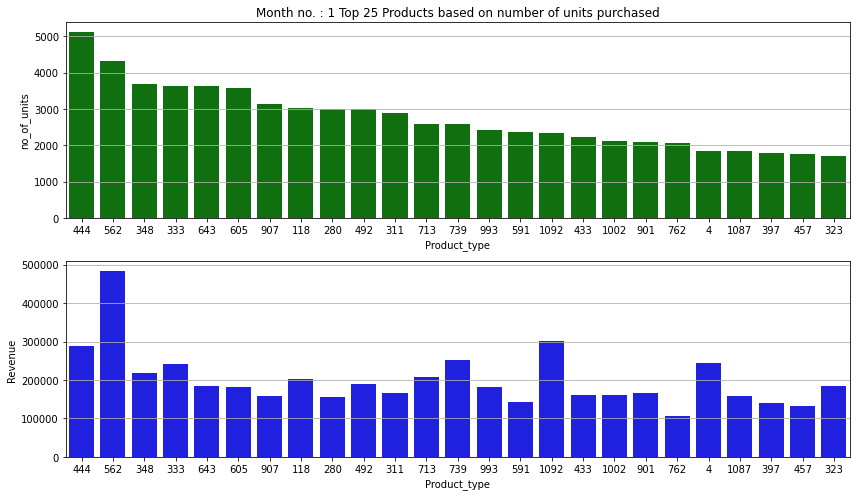

In [65]:
#1st month
month_1 = data[data.month_no==1]
m1 = Month_wise(month_1)
m1

In [66]:
def week_wise(month):
  for i in pd.unique(month.week_no):
    a = month[month.week_no==i]
    fig, axes = plt.subplots(2,tight_layout=True,figsize=(12,7))
    x = a.groupby(['Product_type']).sum().sort_values(by='no_of_units',ascending=False).iloc[:25,]
    axes[0].set_title('Week no. : {} Top 25 Products based on number of units purchased'.format(i))
    axes[0].grid(axis='y')
    sns.barplot(x=x.index,y=x.Revenue,ax=axes[1],order=x.sort_values('no_of_units',ascending=False).index,color='Blue')
    axes[1].grid(axis='y')
    sns.barplot(x=x.index,y=x.no_of_units,ax=axes[0],order=x.sort_values('no_of_units',ascending=False).index,color='Green')
    plt.show()

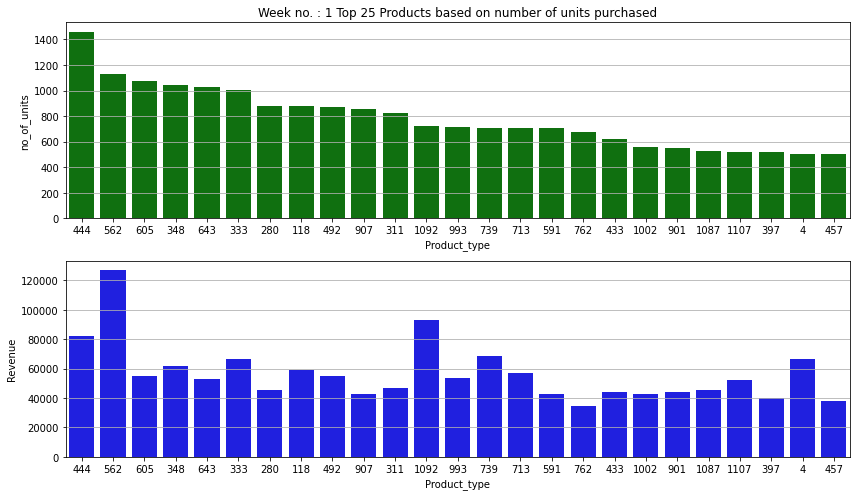

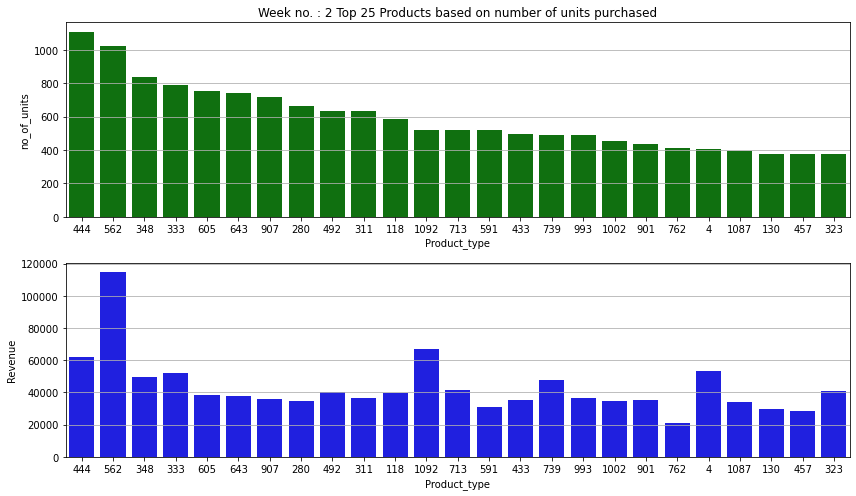

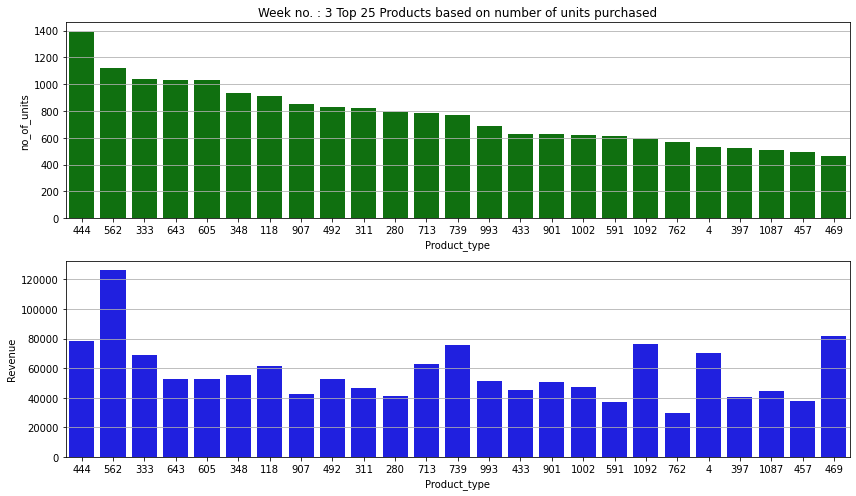

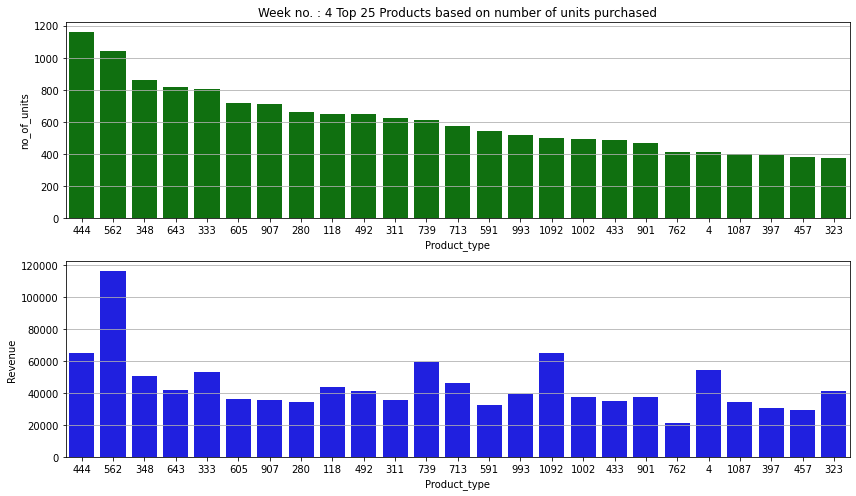

In [67]:
week_wise(month_1)

Sorted based on number of units purchased top 10 records :
       Product_type  Revenue store_status  ...  week_no  month_no  year
44393           909    41551         open  ...        6         2     1
43278           909    30038         open  ...        6         2     1
52666           262    29937         open  ...        7         2     1
60471           262    29879         open  ...        8         2     1
35678          1114    29714         open  ...        5         2     1
35971           292    29161         open  ...        5         2     1
35320           756    29007         open  ...        5         2     1
37056           262    28817         open  ...        5         2     1
36793          1114    28719         open  ...        5         2     1
35930           251    28664         open  ...        5         2     1

[10 rows x 13 columns]


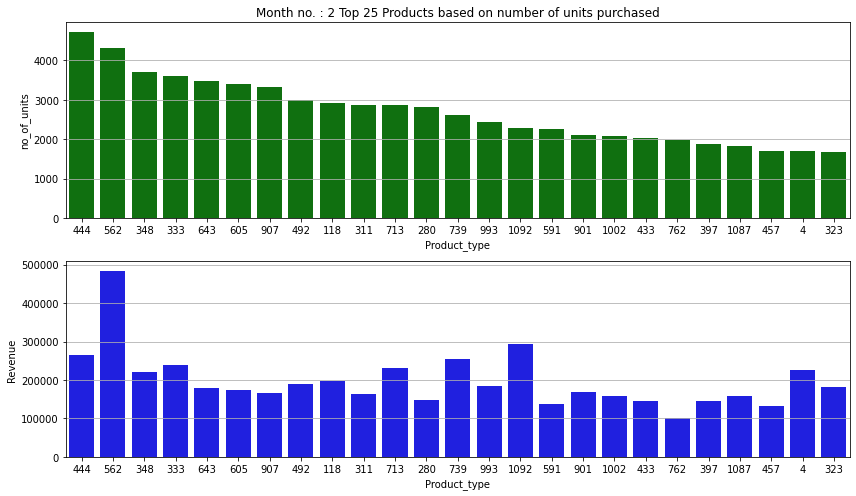

In [68]:
#2nd month
month_2 = data[data.month_no==2]
m2 = Month_wise(month_2)

In [69]:
m2

,Revenue,no_of_units
Product_type,,
1,103040,214
2,119100,67
3,172504,79
4,225539,1709
5,109051,112
...,...,...
1111,116613,81
1112,226014,220
1113,153456,361


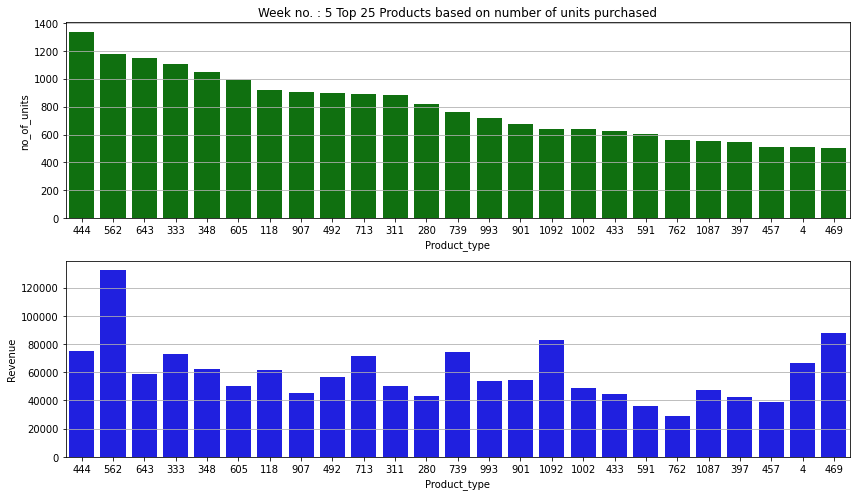

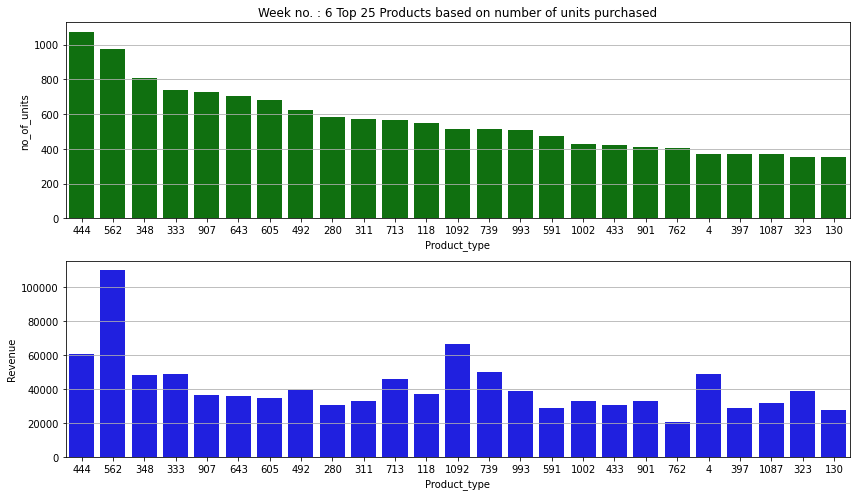

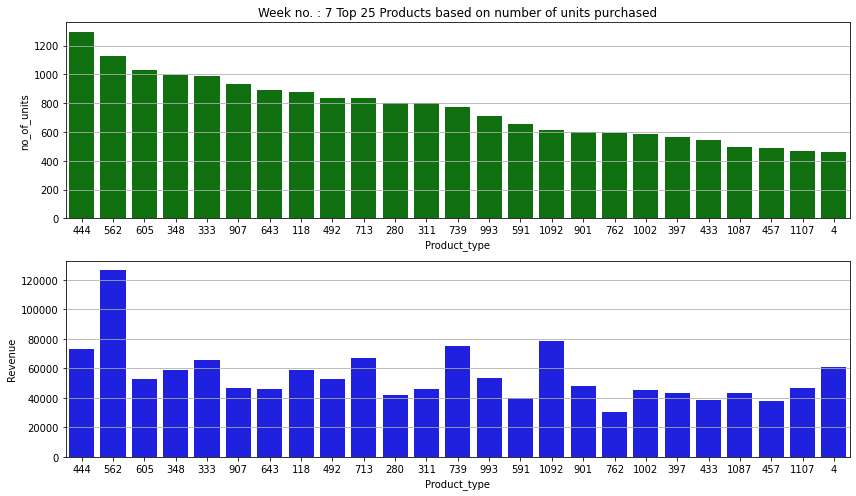

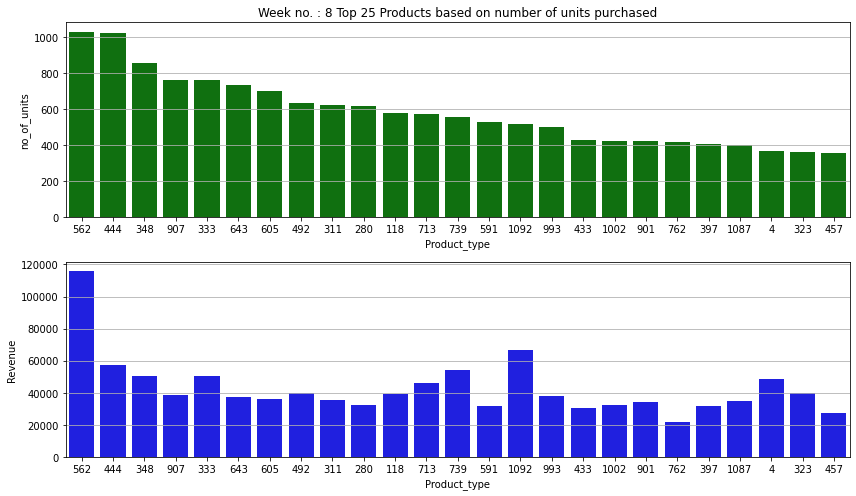

In [70]:
week_wise(month_2)

In [71]:
monthwise_pur = pd.crosstab(index=data['Product_type'],columns=data['month_no'], values=data['no_of_units'],aggfunc='sum')
monthwise_pur

month_no,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
Product_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,239.0,214.0,201.0,219.0,216.0,223.0,223.0,238.0,325.0,231.0,218.0,199.0,210.0,226.0,209.0,222.0,230.0,220.0,225.0,232.0,219.0,292.0,233.0,214.0,222.0,214.0,225.0,230.0,230.0,220.0,264.0,264.0,263.0,151.0
2,61.0,67.0,61.0,68.0,61.0,61.0,60.0,61.0,85.0,63.0,64.0,63.0,60.0,62.0,61.0,58.0,63.0,63.0,59.0,60.0,56.0,83.0,62.0,61.0,61.0,60.0,65.0,62.0,63.0,57.0,66.0,58.0,57.0,35.0
3,75.0,79.0,73.0,78.0,67.0,69.0,66.0,69.0,98.0,70.0,70.0,67.0,64.0,70.0,74.0,69.0,71.0,67.0,68.0,73.0,66.0,95.0,70.0,71.0,65.0,72.0,81.0,76.0,79.0,66.0,82.0,71.0,69.0,46.0
4,1852.0,1709.0,1704.0,1740.0,1741.0,1718.0,1712.0,1751.0,2084.0,1762.0,1701.0,1702.0,1784.0,1750.0,1673.0,1663.0,1675.0,1632.0,1653.0,1710.0,1617.0,2000.0,1615.0,1554.0,1588.0,1565.0,1509.0,1675.0,1736.0,1533.0,1740.0,1703.0,1730.0,1014.0
5,113.0,112.0,112.0,119.0,109.0,110.0,110.0,112.0,156.0,109.0,117.0,110.0,108.0,110.0,110.0,107.0,118.0,109.0,109.0,116.0,99.0,152.0,110.0,111.0,110.0,116.0,135.0,129.0,106.0,95.0,113.0,105.0,104.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,76.0,81.0,75.0,82.0,78.0,79.0,76.0,77.0,100.0,78.0,80.0,77.0,67.0,74.0,75.0,89.0,93.0,98.0,91.0,91.0,84.0,111.0,92.0,87.0,90.0,90.0,88.0,82.0,86.0,83.0,87.0,83.0,82.0,51.0
1112,192.0,220.0,207.0,227.0,197.0,209.0,199.0,200.0,258.0,199.0,212.0,192.0,199.0,203.0,209.0,238.0,247.0,231.0,236.0,243.0,200.0,271.0,227.0,228.0,254.0,249.0,274.0,276.0,283.0,246.0,281.0,283.0,290.0,175.0
1113,373.0,361.0,354.0,372.0,365.0,355.0,354.0,369.0,519.0,372.0,347.0,348.0,380.0,360.0,353.0,353.0,362.0,349.0,343.0,348.0,348.0,507.0,367.0,323.0,326.0,377.0,352.0,348.0,350.0,321.0,357.0,342.0,350.0,209.0


In [72]:
weekwise_pur = pd.crosstab(index=data['Product_type'],columns=data['week_no'], values=data['no_of_units'],aggfunc='sum')
weekwise_pur

week_no,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
Product_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,83.0,48.0,58.0,50.0,64.0,45.0,58.0,47.0,58.0,44.0,58.0,41.0,62.0,57.0,43.0,57.0,46.0,66.0,45.0,59.0,49.0,67.0,50.0,57.0,50.0,63.0,62.0,48.0,58.0,59.0,58.0,63.0,97.0,64.0,87.0,77.0,53.0,59.0,68.0,51.0,...,45.0,55.0,50.0,66.0,51.0,63.0,44.0,59.0,48.0,63.0,50.0,62.0,50.0,70.0,49.0,61.0,50.0,63.0,60.0,43.0,64.0,53.0,63.0,57.0,47.0,66.0,55.0,69.0,74.0,60.0,77.0,56.0,71.0,56.0,78.0,60.0,69.0,53.0,68.0,30.0
2,18.0,13.0,17.0,13.0,23.0,12.0,20.0,12.0,20.0,11.0,19.0,11.0,20.0,17.0,12.0,19.0,11.0,19.0,12.0,19.0,13.0,19.0,12.0,17.0,13.0,20.0,16.0,11.0,19.0,19.0,11.0,12.0,29.0,14.0,23.0,19.0,12.0,19.0,21.0,11.0,...,14.0,19.0,11.0,19.0,12.0,20.0,11.0,18.0,11.0,20.0,11.0,20.0,14.0,19.0,14.0,17.0,12.0,19.0,17.0,10.0,17.0,11.0,16.0,18.0,12.0,18.0,10.0,19.0,19.0,10.0,20.0,12.0,16.0,12.0,18.0,11.0,16.0,10.0,19.0,6.0
3,24.0,13.0,21.0,17.0,24.0,16.0,23.0,16.0,23.0,13.0,22.0,15.0,23.0,19.0,13.0,23.0,15.0,20.0,12.0,20.0,13.0,23.0,12.0,21.0,14.0,22.0,18.0,12.0,18.0,21.0,13.0,17.0,32.0,17.0,26.0,23.0,15.0,21.0,22.0,12.0,...,16.0,19.0,11.0,22.0,13.0,21.0,11.0,23.0,17.0,24.0,13.0,27.0,17.0,24.0,16.0,22.0,14.0,23.0,21.0,12.0,23.0,15.0,20.0,20.0,11.0,23.0,14.0,21.0,24.0,12.0,24.0,13.0,22.0,13.0,23.0,13.0,20.0,12.0,25.0,9.0
4,504.0,404.0,531.0,413.0,508.0,371.0,462.0,368.0,519.0,365.0,464.0,356.0,491.0,432.0,364.0,453.0,395.0,526.0,369.0,451.0,372.0,500.0,396.0,450.0,386.0,506.0,456.0,364.0,443.0,436.0,486.0,386.0,605.0,414.0,545.0,520.0,402.0,446.0,509.0,405.0,...,379.0,412.0,342.0,461.0,373.0,415.0,332.0,453.0,365.0,479.0,303.0,404.0,323.0,451.0,397.0,463.0,364.0,480.0,475.0,325.0,456.0,346.0,457.0,402.0,328.0,434.0,395.0,455.0,456.0,367.0,476.0,393.0,467.0,386.0,506.0,392.0,446.0,349.0,465.0,200.0
5,33.0,22.0,34.0,24.0,35.0,21.0,34.0,22.0,36.0,22.0,32.0,22.0,35.0,29.0,21.0,34.0,20.0,35.0,22.0,32.0,21.0,34.0,23.0,32.0,22.0,34.0,32.0,22.0,32.0,33.0,20.0,27.0,49.0,30.0,40.0,37.0,23.0,31.0,37.0,18.0,...,22.0,31.0,21.0,35.0,23.0,35.0,22.0,34.0,25.0,41.0,27.0,40.0,27.0,42.0,27.0,35.0,25.0,22.0,32.0,20.0,32.0,20.0,29.0,28.0,18.0,29.0,20.0,33.0,31.0,19.0,34.0,21.0,31.0,21.0,31.0,21.0,31.0,21.0,31.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,23.0,16.0,22.0,15.0,24.0,17.0,25.0,15.0,21.0,16.0,23.0,15.0,22.0,21.0,15.0,24.0,16.0,22.0,18.0,22.0,16.0,24.0,16.0,23.0,16.0,22.0,24.0,14.0,23.0,22.0,15.0,17.0,30.0,17.0,27.0,26.0,16.0,22.0,23.0,17.0,...,18.0,26.0,17.0,29.0,18.0,27.0,17.0,27.0,19.0,26.0,17.0,27.0,18.0,24.0,17.0,24.0,17.0,24.0,23.0,16.0,23.0,18.0,24.0,23.0,18.0,25.0,16.0,23.0,23.0,16.0,26.0,17.0,24.0,16.0,24.0,18.0,24.0,15.0,26.0,10.0
1112,56.0,38.0,58.0,40.0,60.0,44.0,70.0,46.0,66.0,41.0,62.0,38.0,67.0,60.0,38.0,62.0,37.0,62.0,38.0,60.0,37.0,66.0,43.0,63.0,42.0,60.0,58.0,39.0,59.0,61.0,40.0,40.0,79.0,47.0,68.0,64.0,39.0,58.0,58.0,44.0,...,44.0,69.0,47.0,87.0,51.0,77.0,47.0,75.0,50.0,75.0,53.0,91.0,55.0,88.0,55.0,79.0,54.0,80.0,76.0,44.0,83.0,49.0,76.0,73.0,48.0,79.0,49.0,72.0,81.0,53.0,83.0,54.0,93.0,56.0,96.0,56.0,82.0,50.0,95.0,30.0
1113,95.0,80.0,110.0,88.0,107.0,77.0,99.0,78.0,102.0,74.0,100.0,78.0,107.0,89.0,82.0,94.0,76.0,112.0,81.0,96.0,81.0,101.0,78.0,95.0,84.0,102.0,94.0,74.0,95.0,97.0,77.0,100.0,150.0,102.0,146.0,121.0,86.0,99.0,104.0,83.0,...,75.0,87.0,70.0,93.0,76.0,93.0,74.0,98.0,112.0,106.0,73.0,93.0,80.0,99.0,77.0,94.0,78.0,100.0,94.0,65.0,91.0,78.0,88.0,84.0,71.0,89.0,77.0,96.0,95.0,76

In [73]:
monthly = data.groupby(['year','month_no','Product_type']).sum().reset_index()
#deleting unwanted columns
monthly.drop(['DayOfWeek','cost_per_unit','Time_for_delivery'],axis=1,inplace=True)
monthly

,year,month_no,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units,week_no
0,1,1,1,114747,10,0,5,239,70
1,1,1,2,116307,10,0,15,61,70
2,1,1,3,165501,10,0,20,75,70
3,1,1,4,243853,10,0,12,1852,70
4,1,1,5,107427,10,0,15,113,70
...,...,...,...,...,...,...,...,...,...
36825,3,34,1111,74600,5,1,4,51,2409
36826,3,34,1112,175491,5,1,4,175,2409
36827,3,34,1113,89124,5,1,4,209,2409
36828,3,34,1114,262661,5,1,4,205,2409


In [111]:
34*1115

37910

In [114]:
37910-36830

1080

In [74]:
weekly = data.groupby(['year','month_no','week_no','Product_type']).sum().reset_index()
#deleting unwanted columns
weekly.drop(['DayOfWeek','cost_per_unit','Time_for_delivery'],axis=1,inplace=True)
weekly.head()

,year,month_no,week_no,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units
0,1,1,1,1,39469,5,0,5,83
1,1,1,1,2,32843,5,0,5,18
2,1,1,1,3,51626,5,0,5,24
3,1,1,1,4,66305,5,0,5,504
4,1,1,1,5,30836,5,0,5,33


In [75]:
weekly.iloc[4455:4470,:]

,year,month_no,week_no,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units
4455,1,1,4,1111,21614,0,0,5,15
4456,1,1,4,1112,40647,0,0,5,40
4457,1,1,4,1113,37024,0,0,0,88
4458,1,1,4,1114,122720,0,0,0,96
4459,1,1,4,1115,35612,0,0,0,75
4460,1,2,5,1,30397,5,0,0,64
4461,1,2,5,2,37686,5,0,0,23
4462,1,2,5,3,52570,5,0,5,24
4463,1,2,5,4,66869,5,0,0,508
4464,1,2,5,5,32897,5,0,0,35


In [76]:
weekly.Generic_Holiday.value_counts()

0    115910
1     26950
2      2050
Name: Generic_Holiday, dtype: int64

In [77]:
monthly.Generic_Holiday.value_counts()

0    19909
1     7125
2     5901
3     3457
4      438
Name: Generic_Holiday, dtype: int64

In [78]:
weekly

,year,month_no,week_no,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units
0,1,1,1,1,39469,5,0,5,83
1,1,1,1,2,32843,5,0,5,18
2,1,1,1,3,51626,5,0,5,24
3,1,1,1,4,66305,5,0,5,504
4,1,1,1,5,30836,5,0,5,33
...,...,...,...,...,...,...,...,...,...
144905,3,34,135,1111,14316,0,1,4,10
144906,3,34,135,1112,29301,0,1,4,30
144907,3,34,135,1113,17305,0,1,4,41
144908,3,34,135,1114,57476,0,1,4,44


In [79]:
from tqdm import tqdm
x = 1
weekly['updated_week'] = 0
for i in tqdm(range(1,len(weekly),4)):
  weekly.updated_week[weekly.week_no==i] = 1
  weekly.updated_week[weekly.week_no==i+1] = 2
  weekly.updated_week[weekly.week_no==i+2] = 3
  weekly.updated_week[weekly.week_no==i+3] = 4

100%|██████████| 36228/36228 [06:42<00:00, 89.97it/s]


In [115]:
weekly[weekly.month_no==34]

,year,month_no,week_no,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units,updated_week,updated_month
141565,3,34,133,1,25748,0,0,0,53,1,10
141566,3,34,133,2,21312,0,0,0,10,1,10
141567,3,34,133,3,28742,0,0,0,12,1,10
141568,3,34,133,4,46116,0,0,0,349,1,10
141569,3,34,133,5,20895,0,0,0,21,1,10
...,...,...,...,...,...,...,...,...,...,...,...
144905,3,34,135,1111,14316,0,1,4,10,3,10
144906,3,34,135,1112,29301,0,1,4,30,3,10
144907,3,34,135,1113,17305,0,1,4,41,3,10
144908,3,34,135,1114,57476,0,1,4,44,3,10


In [81]:
x = 1
weekly['updated_month'] = 0
for i in tqdm(range(1,len(weekly),12)):
  for j in range(0,12,1):
    weekly.updated_month[weekly.month_no==i+j] = j+1

100%|██████████| 12076/12076 [06:24<00:00, 31.44it/s]


In [82]:
weekly[(weekly.year==2) & (weekly.updated_month==2)]

,year,month_no,week_no,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units,updated_week,updated_month
54200,2,14,53,1,30521,5,0,4,65,1,2
54201,2,14,53,2,32054,5,0,5,19,1,2
54202,2,14,53,3,45590,5,0,5,21,1,2
54203,2,14,53,4,63323,5,0,5,480,1,2
54204,2,14,53,5,29844,5,0,5,32,1,2
...,...,...,...,...,...,...,...,...,...,...,...
57935,2,14,56,1111,24100,0,0,5,16,4,2
57936,2,14,56,1112,44595,0,0,5,42,4,2
57937,2,14,56,1113,37717,0,0,0,89,4,2
57938,2,14,56,1114,114243,0,0,2,91,4,2


In [83]:
final = weekly.drop(['month_no','week_no'],axis=1)

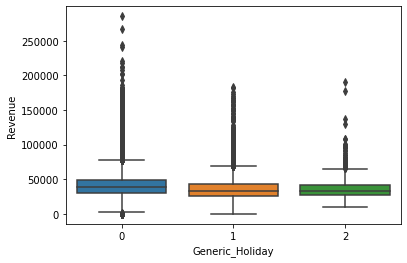

In [84]:
sns.boxplot(x=final.Generic_Holiday,y=final.Revenue)

In [85]:
final[['Revenue','Generic_Holiday','no_of_units']].groupby('Generic_Holiday').describe()

Revenue                              ... no_of_units              
                    count          mean           std  ...         50%   75%     max
Generic_Holiday                                        ...                          
0                115910.0  41639.925735  17380.554476  ...        38.0  78.0  2423.0
1                 26950.0  36114.649351  15453.408355  ...        33.0  68.0  1660.0
2                  2050.0  35814.986829  13831.068905  ...        32.5  65.0  1392.0

[3 rows x 16 columns]

In [86]:
final[['Revenue','Education_Holiday','no_of_units']].groupby('Education_Holiday').describe()

Revenue                              ... no_of_units              
                      count          mean           std  ...         50%   75%     max
Education_Holiday                                        ...                          
0                  104537.0  41395.948784  17321.563796  ...        37.0  78.0  2423.0
1                    3351.0  36023.312146  15135.108509  ...        32.0  67.0  1506.0
2                    2439.0  41174.854449  20530.921299  ...        38.0  78.0  1660.0
3                    1249.0  42994.779824  17703.757574  ...        39.0  84.0  1849.0
4                    2241.0  25763.601963  12619.635218  ...        24.0  50.0  1040.0
5                   28435.0  39015.300123  16034.321682  ...        35.0  73.0  1525.0
7                    2658.0  39055.551919  15311.969251  ...        32.0  68.0  1298.0

[7 rows x 16 columns]

In [87]:
final[['Revenue','Promotion_applied','no_of_units']].groupby('Promotion_applied').describe()

Revenue                              ... no_of_units               
                     count          mean           std  ...         50%    75%     max
Promotion_applied                                       ...                           
0                  67150.0  33729.080015  13620.683308  ...        30.0  63.00  1520.0
1                    180.0  50156.700000  15860.314199  ...        47.0  92.25  1106.0
5                  77580.0  46394.152952  17684.615519  ...        42.0  88.00  2423.0

[3 rows x 16 columns]

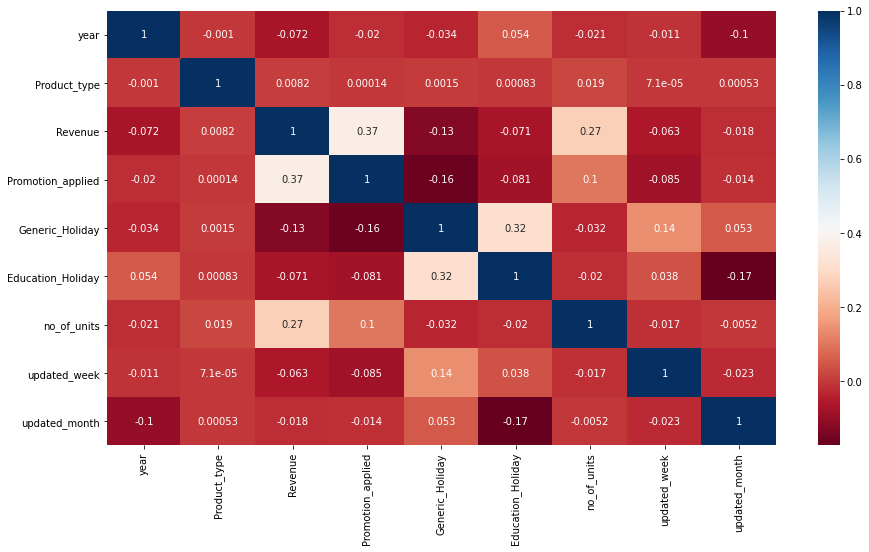

In [88]:
plt.figure(figsize=(15,8))
sns.heatmap(final.corr(),annot=True,cmap='RdBu')

In [89]:
final[final.Education_Holiday>=5]

,year,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units,updated_week,updated_month
0,1,1,39469,5,0,5,83,1,1
1,1,2,32843,5,0,5,18,1,1
2,1,3,51626,5,0,5,24,1,1
3,1,4,66305,5,0,5,504,1,1
4,1,5,30836,5,0,5,33,1,1
...,...,...,...,...,...,...,...,...,...
143762,3,1083,24605,5,0,7,11,2,10
143763,3,1084,40080,5,0,7,21,2,10
143765,3,1086,68646,5,0,7,54,2,10
143782,3,1103,23814,5,0,7,25,2,10


In [90]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144910 entries, 0 to 144909
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   year               144910 non-null  int64
 1   Product_type       144910 non-null  int64
 2   Revenue            144910 non-null  int64
 3   Promotion_applied  144910 non-null  int64
 4   Generic_Holiday    144910 non-null  int64
 5   Education_Holiday  144910 non-null  int64
 6   no_of_units        144910 non-null  int64
 7   updated_week       144910 non-null  int64
 8   updated_month      144910 non-null  int64
dtypes: int64(9)
memory usage: 10.0 MB


In [91]:
x = final.drop(['year','Revenue','Education_Holiday','no_of_units'],axis=1)
x

,Product_type,Promotion_applied,Generic_Holiday,updated_week,updated_month
0,1,5,0,1,1
1,2,5,0,1,1
2,3,5,0,1,1
3,4,5,0,1,1
4,5,5,0,1,1
...,...,...,...,...,...
144905,1111,0,1,3,10
144906,1112,0,1,3,10
144907,1113,0,1,3,10
144908,1114,0,1,3,10


In [92]:
y = final.no_of_units
y

0          83
1          18
2          24
3         504
4          33
         ... 
144905     10
144906     30
144907     41
144908     44
144909     27
Name: no_of_units, Length: 144910, dtype: int64

In [93]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test= {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (115928, 5), y_train = (115928,), x_test = (28982, 5), y_test= (28982,)


In [94]:
#training linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin = LinearRegression()

In [95]:
pred_lin = lin.fit(x,y).predict(x_test)

RMSE_lin = np.sqrt(mean_squared_error(y_test,pred_lin))
print(RMSE_lin)

116.1821736599139


In [96]:
lin.predict([[1115,0,1,3,10]])

array([61.71210764])

In [97]:
from sklearn.ensemble import RandomForestRegressor

rand = RandomForestRegressor()

In [98]:
pred_rand = rand.fit(x,y).predict(x_test)

RMSE_rand = np.sqrt(mean_squared_error(y_test,pred_rand))
print(RMSE_rand)

10.545209488826217


In [116]:
rand.predict([[1107,0,1,4,1]])

array([251.42566667])

In [117]:
final[final.Product_type==1107]

,year,Product_type,Revenue,Promotion_applied,Generic_Holiday,Education_Holiday,no_of_units,updated_week,updated_month
1106,1,1107,52259,5,0,0,520,1,1
2221,1,1107,31119,0,0,0,308,2,1
3336,1,1107,43185,5,0,0,429,3,1
4451,1,1107,25031,0,0,0,247,4,1
5566,1,1107,46853,5,0,0,465,1,2
...,...,...,...,...,...,...,...,...,...
140441,3,1107,28219,0,0,0,279,3,9
141556,3,1107,41037,5,0,0,408,4,9
142671,3,1107,25888,0,0,0,256,1,10
143786,3,1107,42730,5,1,0,424,2,10
